**Review**

Hello Byron!

I'm happy to review your project today.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  Thank you so much for your feedbacks. I've split the cells into multiple so it's easier. Hopefully i got it right this time. Thank you!
</div>
  
First of all, thank you for turning in the project! You did a great job overall, but there are some small problems that need to be fixed before the project will be accepted. Let me know if you have any questions!


###  Title: Sprint 10: Integrated Project 2

### Note to Reviewer:
My apologies, I was not able to download your version of my project with your corrections.  Sorry for the inconvenience.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Okay. But, please, next time copy and paste all my comments to your work because I can't check your project from the scratch each time.
  
</div>

### Summary:
This project contains data from a companed named Zyfra.  The main objective for this project is to create a model that accurately predicts the amount of gold recovered from gold ore.  The model types that I have chosen to evaluate for this task consists of: Linear Regression, Decision Tree Regressor, K Nearest Neighbors, Polynomial Features, and Random Forest Regressor. These models with be evaluated using cross validation and the fSMAPE metric. This project includes other tasks such as: veryifying if recovery is calculated correctly by using mean absolute error, using bar charts to observe how concentrations of metal (Au, Ag, Pb) change depending on purification stage, using histograms in order to check for anomalies in feed particle size distributions and total concentrations of metals at different stages (raw feed, rougher output, final concentrate) in both the training set and test set.

#### Step 1. Prepare the data

1.1. Open the files and look into the data.

In [1]:
#Import the necessary libraries.
import pandas as pd

from sklearn.metrics import mean_absolute_error, make_scorer

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, RandomizedSearchCV

import xgboost as xgb

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import GridSearchCV

import numpy as np

import seaborn as sns

##### Datasets

In [2]:
#Create a dataframe from the training set csv file with the name data_train.
data_train = pd.read_csv('/datasets/gold_recovery_train.csv')
#Create a subset from the data_train column for the C,F, and T variables in the recovery function for task 1.2.
subset = data_train[['rougher.output.concentrate_au','rougher.input.feed_au', 'rougher.output.tail_au', 'rougher.output.recovery']]
subset = subset.dropna(axis=0)

In [3]:
#Create a dataframe for the testing set csv file with the name data_test.
data_test = pd.read_csv('/datasets/gold_recovery_test.csv')

In [4]:
#Create a dataframe for the full set csv file with the name data_full.
data_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [5]:
#Use the head() method to print the first five lines of the data_train dataframe.
data_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Code Result:
It appears that the rows and columns of the data_train dataframe are listed correctly.  No abnormal or unsual entries noted.

In [6]:
#Use the head() method to print the first five lines of the data_test dataframe.
data_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


Code Result:
It appears that the rows and columns of the data_test dataframe are listed correctly.  No abnormal or unsual entries noted.

In [7]:
#Use the head() method to print the first five lines of the data_full dataframe.
data_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Code Result:
It appears that the rows and columns of the data_full dataframe are listed correctly.  No abnormal or unsual entries noted.

##### 1.4. Perform data preprocessing.

##### Training Set

In [8]:
#Use the isna() and sum() methods in order to count the number of missing values in the columns of the data_train dataframe.
data_train.isna().sum()

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

Code Result:
It appears that there is a small amount of missing values noted in the columns of the data_train dataframe.

In [9]:
#Use the bfill() method in order to backfill each missing value in the dataframe with data from the previous row.
data_train.ffill(inplace=True)

In [10]:
#Double check for missing values once again in the data_train dataframe.
data_train.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

Code Result:
It appears that the data_train dataframe no longer contains missing values.  The missing values were filled successfully.

##### Test Set

In [11]:
#Use the isna() and sum() methods in order to count the number of missing values in the columns of the data_test dataframe.
data_test.isna().sum()

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


Code Result:
It appears that there is a small amount of missing values noted in the columns of the data_test dataframe.

In [12]:
#Use the bfill() method in order to backfill each missing value in the dataframe with data from the previous row.
data_test.ffill(inplace=True)

In [13]:
#Double check for missing values once again in the data_test dataframe.
data_test.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

Code Result:
It appears that the data_test dataframe no longer contains missing values.  The missing values were filled successfully.

##### Full Set

In [14]:
#Use the isna() and sum() methods in order to count the number of missing values in the columns of the data_full dataframe.
data_full.isna().sum()

date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64

Code Result:
It appears that there is a small amount of missing values noted in the columns of the data_full dataframe.

In [15]:
#Use the bfill() method in order to backfill each missing value in the dataframe with data from the previous row.
data_full.ffill(inplace=True)

In [16]:
#Double check for missing values once again in the data_full dataframe.
data_full.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

Code Result:
It appears that the data_full dataframe no longer contains missing values.  The missing values were filled successfully.

##### Duplicate Values

In [17]:
#Use the duplicated() and sum() methods to check for duplicate values in the data_train dataframe.
data_train.duplicated().sum()

0

Code Result:
There are no duplicate values noted in the data_train dataframe.

In [18]:
#Use the duplicated() and sum() methods to check for duplicate values in the data_test dataframe.
data_test.duplicated().sum()

0

Code Result:
There are no duplicate values noted in the data_test dataframe.

In [19]:
#Use the duplicated() and sum() methods to check for duplicate values in the data_full dataframe.
data_full.duplicated().sum()

0

Code Result:
There are no duplicate values noted in the data_full dataframe.

##### Data Types

##### Training Set Data Types

In [20]:
#Use the info() method in order to check the data types in the columns of the data_train dataframe.
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16860 non-null  float64
 2   final.output.concentrate_pb                         16860 non-null  float64
 3   final.output.concentrate_sol                        16860 non-null  float64
 4   final.output.concentrate_au                         16860 non-null  float64
 5   final.output.recovery                               16860 non-null  float64
 6   final.output.tail_ag                                16860 non-null  float64
 7   final.output.tail_pb                                16860 non-null  float64
 8   final.output.tail_sol                               16860 non-null  float64


Code Result:
The date column of the dataframe is listed as the object data type and needs to be converted to the datetime64[ns] data type.
All the other columns in the dataframe appear to have the appropriate data type.

In [21]:
#Use the pd.to_datetime() method in order to convert the date column to the datetime64[ns] data type.
data_train['date'] = pd.to_datetime(data_train['date'], format='%Y-%m-%d %H:%M:%S')

In [22]:
#Use the info() method once again to double check the datatypes of the columns in the data_train dataframe.
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                16860 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         16860 non-null  float64       
 2   final.output.concentrate_pb                         16860 non-null  float64       
 3   final.output.concentrate_sol                        16860 non-null  float64       
 4   final.output.concentrate_au                         16860 non-null  float64       
 5   final.output.recovery                               16860 non-null  float64       
 6   final.output.tail_ag                                16860 non-null  float64       
 7   final.output.tail_pb                                16860 non-null  float64       
 8   final.

Code Result:
It appears that date column of the data_train column was converted to datetime64[ns] sucessfully.

##### Test Set

In [23]:
#Use the info() method in order to check the data types in the columns of the data_test dataframe.
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5856 non-null   float64
 2   primary_cleaner.input.depressant            5856 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5856 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5856 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5856 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5856 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5856 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5856 non-null   float64
 10  primary_clea

Code Result:
The date column of the dataframe is listed as the object data type and needs to be converted to the datetime64[ns] data type.
All the other columns in the dataframe appear to have the appropriate data type.

In [24]:
#Use the pd.to_datetime() method in order to convert the date column to the datetime64[ns] data type.
data_test['date'] = pd.to_datetime(data_test['date'], format='%Y-%m-%d %H:%M:%S')

In [25]:
#Use the info() method once again to double check the datatypes of the columns in the data_test dataframe.
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5856 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5856 non-null   float64       
 2   primary_cleaner.input.depressant            5856 non-null   float64       
 3   primary_cleaner.input.feed_size             5856 non-null   float64       
 4   primary_cleaner.input.xanthate              5856 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5856 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5856 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5856 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5856 non-null   float64       
 9   primary_

Code Result:
It appears that date column of the data_test column was converted to datetime64[ns] sucessfully.

##### Full Set

In [26]:
#Use the info() method in order to check the data types in the columns of the data_full dataframe.
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22716 non-null  float64
 2   final.output.concentrate_pb                         22716 non-null  float64
 3   final.output.concentrate_sol                        22716 non-null  float64
 4   final.output.concentrate_au                         22716 non-null  float64
 5   final.output.recovery                               22716 non-null  float64
 6   final.output.tail_ag                                22716 non-null  float64
 7   final.output.tail_pb                                22716 non-null  float64
 8   final.output.tail_sol                               22716 non-null  float64


Code Result:
The date column of the dataframe is listed as the object data type and needs to be converted to the datetime64[ns] data type.
All the other columns in the dataframe appear to have the appropriate data type.

In [27]:
#Use the pd.to_datetime() method in order to convert the date column to the datetime64[ns] data type.
data_full['date'] = pd.to_datetime(data_full['date'], format='%Y-%m-%d %H:%M:%S')

In [28]:
#Use the info() method once again to double check the datatypes of the columns in the data_full dataframe.
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                22716 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         22716 non-null  float64       
 2   final.output.concentrate_pb                         22716 non-null  float64       
 3   final.output.concentrate_sol                        22716 non-null  float64       
 4   final.output.concentrate_au                         22716 non-null  float64       
 5   final.output.recovery                               22716 non-null  float64       
 6   final.output.tail_ag                                22716 non-null  float64       
 7   final.output.tail_pb                                22716 non-null  float64       
 8   final.

Code Result:
It appears that date column of the data_full column was converted to datetime64[ns] sucessfully.

<div class="alert alert-block alert-success">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Everything is correct. Good job!
  
</div>

#### 1.2. Check that recovery is calculated correctly. Using the training set, calculate recovery for the rougher.output.recovery feature. Find the MAE between your calculations and the feature values. Provide findings.

##### Recovery function

In [29]:
#Create a function to calculate the recovery rate.
def recovery(C, F, T):
    numerator = C * (F - T) 
    denominator = F * (C - T)
    division = numerator / denominator
    recovery = division * 100
    return recovery

In [30]:
#Create a variable for the C arguement of the recovery function that contains the values for the share of gold concentrate right
#after flotation.
C = subset['rougher.output.concentrate_au']

#Create a variable for the F arguement of the recovery function that contains the values for the share of gold in the feed right
#before flotation.
F = subset['rougher.input.feed_au']

#Create a variable for the F arguement of the recovery function that contains the values for the share of gold in the feed right
#before flotation.
T = subset['rougher.output.tail_au']
subset['calculated_recovery'] = recovery(C, F, T)
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14287 entries, 0 to 16859
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   rougher.output.concentrate_au  14287 non-null  float64
 1   rougher.input.feed_au          14287 non-null  float64
 2   rougher.output.tail_au         14287 non-null  float64
 3   rougher.output.recovery        14287 non-null  float64
 4   calculated_recovery            14287 non-null  float64
dtypes: float64(5)
memory usage: 669.7 KB


In [31]:
#Create a new column in the data_train dataframe that consists of the results of the recovery function when using the previously
#created variables for: C, F, and T.
data_train['calculated_recovery'] = recovery(C, F, T)

In [32]:
#Use the isna() and sum() methods in order to check for missing values in the data_train dataframe.
data_train.isna().sum()

date                                             0
final.output.concentrate_ag                      0
final.output.concentrate_pb                      0
final.output.concentrate_sol                     0
final.output.concentrate_au                      0
                                              ... 
secondary_cleaner.state.floatbank5_b_air         0
secondary_cleaner.state.floatbank5_b_level       0
secondary_cleaner.state.floatbank6_a_air         0
secondary_cleaner.state.floatbank6_a_level       0
calculated_recovery                           2573
Length: 88, dtype: int64

Code Result:
There are 2,573 missing values noted in the calculated_recovery column of the data_train dataframe.

In [33]:
#Use the dropna() method in order to create a new dataframe that only contains all the non-null values of the data_train dataframe.
#Name the new dataframe dt_clean.
dt_clean = data_train.dropna()

In [34]:
#Use the isna() and sum() methods in order to check for missing values in the dt_clean dataframe.
dt_clean.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
calculated_recovery                           0
Length: 88, dtype: int64

Code Result:
There are no missing values noted in the dt_clean dataframe.

In [35]:
#Use the mean_absolute_error function in order to check if the recovery rate in the 'rougher.output.recovery' column was calculated 
#correctly when compared to the newly created 'calculated_recovery' column.
calc_recovery_mae = mean_absolute_error(dt_clean['calculated_recovery'], dt_clean['rougher.output.recovery'])

calc_recovery_mae

9.303415616264301e-15

Code Result:
It appears that the mean absolute error betweem the recovery in the 'calculated_recovery' column and the recovery in the 'rougher.output.recovery' column is: approximately 9.30.  Although the recovery in the 'rougher.output.recovery' column is not 100% error free, the mean absolute error is a very small amount, which suggests that the majority of rows in the 'rougher.output.recovery' columns have their recovery calculated correctly.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Correct. But it's not 9.3. It's 9.3 * 10^(-15). So, it's almost zero.
  
</div>

1.3. Analyze the features not available in the test set. What are these parameters? What is their type?

In [36]:
#Use the columns and the difference methods on the data_train and data_test dataframes in order to create an variable named not_in_test.  
# This variable will serve as the index of columns that are present in the training set, but not present in the testing set
not_in_test = data_train.columns.difference(data_test.columns)

In [37]:
#Create a dataframe named train_nt that consists of all the rows of the data_train column in accordance to the not_in_test 
#variable's index.
train_nt = data_train[not_in_test]

#Use the dtypes method to creata a datframe called tnt_dtype that consists of all the data types of the columns in the
#train_nt dataframe.
tnt_dtype = train_nt.dtypes

#Print tnt_dtype.
tnt_dtype

calculated_recovery                                   float64
final.output.concentrate_ag                           float64
final.output.concentrate_au                           float64
final.output.concentrate_pb                           float64
final.output.concentrate_sol                          float64
final.output.recovery                                 float64
final.output.tail_ag                                  float64
final.output.tail_au                                  float64
final.output.tail_pb                                  float64
final.output.tail_sol                                 float64
primary_cleaner.output.concentrate_ag                 float64
primary_cleaner.output.concentrate_au                 float64
primary_cleaner.output.concentrate_pb                 float64
primary_cleaner.output.concentrate_sol                float64
primary_cleaner.output.tail_ag                        float64
primary_cleaner.output.tail_au                        float64
primary_

Code Result:
According to the code result, the features not available in the test set consists of the parameters for the ag, au, pb and sol metals: final.output.concentrate, final.output.tail, primary_cleaner.output.conentrate, primary_cleaner.output.tail, rougher.output.conentrate, secondary_cleaner.output.tail.  The features not available in the test set also consists of the following parameters as well: calculated_recovery, rougher.calculation.au_pb_ratio, rougher.calculation.floatbank10_sulafate_to_au_feed, rougher.calculation.floatbank11_sulafate_to_au_feed, rougher.calculation.sulfate_to_au_concentrate. The features not available in the test set consists of the float64 data type.

<div class="alert alert-block alert-success">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Correct
  
</div>

#### Step 2.
2.1. Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.

#### Gold (Au) Concentration Histogram

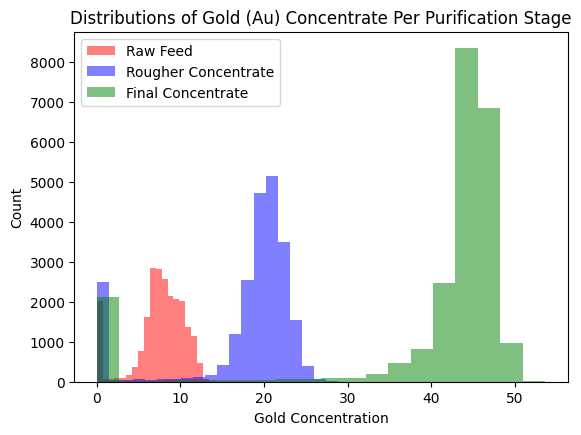

In [38]:
#Use matplotlib in order to create a histogram to show the distributions of gold(au) concentrate in each purification
#stage
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
plt.hist(data_full['rougher.input.feed_au'], bins=20, alpha=0.5, label='Raw Feed', color='red')
plt.hist(data_full['rougher.output.concentrate_au'], bins=20, alpha=0.5, label='Rougher Concentrate', color='blue')
plt.hist(data_full['final.output.concentrate_au'], bins=20, alpha=0.5, label='Final Concentrate', color='green')

plt.legend(loc='upper left')
plt.title("Distributions of Gold (Au) Concentrate Per Purification Stage")
plt.xlabel("Gold Concentration")
plt.ylabel("Count")

plt.tight_layout
plt.show()

Conclusion:
According to the histogram, the Final Concentrate Stage has the greatest amount of gold concentration with a peak value of: approximately 43-45 and a count of: approximately 8300 values.  The Rougher Concentrate Stage has the second highest amount gold concentration with a peak value of: approximately 21.5-22 and a count of: approximately 5200 values.  The Raw Feed Stage has the lowest gold concentration amount with a peak value of: approximately 7-7.2 and a count of approximately 2800 values.

#### Gold (Au) Concentration KDE Plot

<function matplotlib.pyplot.show(close=None, block=None)>

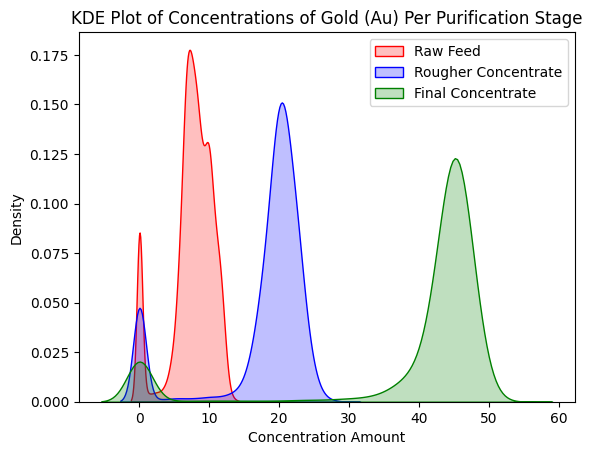

In [39]:
#Use sns.kdeplot() in order to create a KDE plot of the gold(au) concentrations for each purification stage.
sns.kdeplot(data_full['rougher.input.feed_au'], color='red', label='Raw Feed', shade=True)
sns.kdeplot(data_full['rougher.output.concentrate_au'], color='blue', label='Rougher Concentrate', shade=True)
sns.kdeplot(data_full['final.output.concentrate_au'], color='green', label='Final Concentrate', shade=True)

#Use matplotlib in order to dispay the KDE plot.
plt.xlabel("Concentration Amount")
plt.title("KDE Plot of Concentrations of Gold (Au) Per Purification Stage")
plt.legend(loc='upper right')
plt.tight_layout

plt.show

Conclusion:
It appears that the Final Concentrate Stage peaks at the highest gold concentration value which would be: approximately 47.  The Final Concentrate Stage's gold concentration peak value has a kernel density of: approximately 0.127.  The Rougher Concentrate stage peaks at the second highest gold concentration value, which would be: approximately 20.5.  The Rougher Concentrate's gold concentration peak value has a kernel density of:  approximately 0.150.  The Raw Feed Stage peaks at the lowest gold concentration value of: approximately 8.  The Raw Feed Stage's gold concentraiton peak value has a kernel density of:  approximately 0.170.

#### Silver (Ag) Concentration Histogram

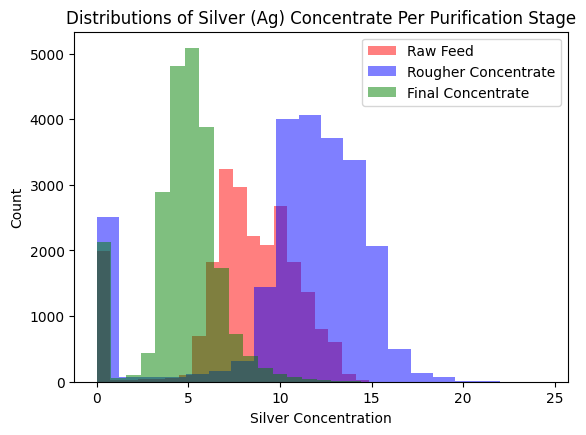

In [40]:
#Use matplotlib in order to create a histogram to show the distributions of silver(ag) concentrate in each purification
#stage
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
plt.hist(data_full['rougher.input.feed_ag'], bins=20, alpha=0.5, label='Raw Feed', color='red')
plt.hist(data_full['rougher.output.concentrate_ag'], bins=20, alpha=0.5, label='Rougher Concentrate', color='blue')
plt.hist(data_full['final.output.concentrate_ag'], bins=20, alpha=0.5, label='Final Concentrate', color='green')

plt.legend(loc='upper right')
plt.title("Distributions of Silver (Ag) Concentrate Per Purification Stage")
plt.xlabel("Silver Concentration")
plt.ylabel("Count")

plt.tight_layout
plt.show()

Conclusion:
According to the histogram, the Rougher Concentrate Stage has the greatest amount of silver concentration with a peak value of: approximately 12-12.5 and a count of: approximately 4100 values.  The Raw Feed Stage has the second highest amount silver concentration with a peak value of: approximately 6.5-7 and a count of: approximately 3200 values.  The Final Concentrate Stage has the lowest silver concentration amount with a peak value of: approximately 5.2-5.7 and a count of approximately 5100 values.

#### Silver (Ag) Concentration KDE Plot

<function matplotlib.pyplot.show(close=None, block=None)>

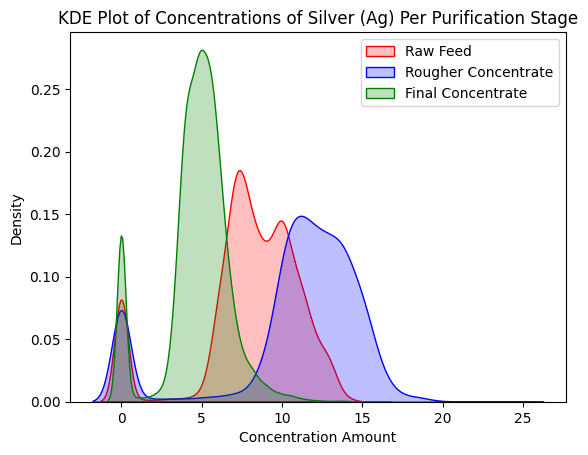

In [41]:
#Use sns.kdeplot() in order to create a KDE plot of the silver(ag) concentrations for each purification stage.
sns.kdeplot(data_full['rougher.input.feed_ag'], color='red', label='Raw Feed', shade=True)
sns.kdeplot(data_full['rougher.output.concentrate_ag'], color='blue', label='Rougher Concentrate', shade=True)
sns.kdeplot(data_full['final.output.concentrate_ag'], color='green', label='Final Concentrate', shade=True)

#Use matplotlib in order to dispay the KDE plot.
plt.xlabel("Concentration Amount")
plt.title("KDE Plot of Concentrations of Silver (Ag) Per Purification Stage")
plt.legend(loc='upper right')
plt.tight_layout

plt.show

Conclusion:
It appears that the Rougher Concentrate Stage peaks at the highest silver concentration value which would be: approximately 12.5.  The Rougher Concentrate Stage's silver concentration peak value has a kernel density of: approximately 0.08.  The Raw Feed Stage peaks at the second highest silver concentration value, which would be: approximately 7.5.  The Rougher Concentrate's gold concentration peak value has a kernel density of:  approximately 0.18.  The Final Concentrate Stage peaks at the lowest silver concentration value of: approximately 4.8.  The Final Concentrate Stage's silver concentration peak value has a kernel density of: approximately 0.28.

#### Lead (Pb) Concentration Histogram

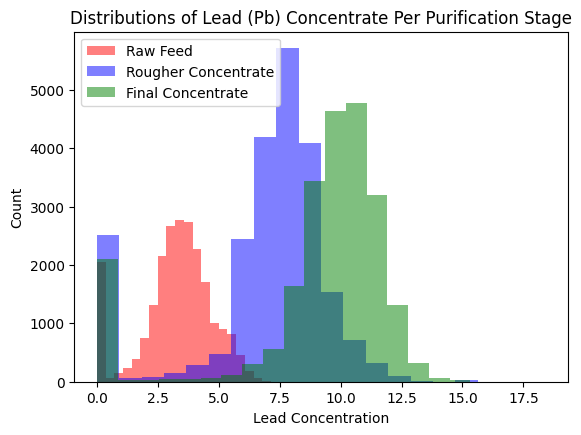

In [42]:
#Use matplotlib in order to create a histogram to show the distributions of lead(pb) concentrate in each purification
#stage
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
plt.hist(data_full['rougher.input.feed_pb'], bins=20, alpha=0.5, label='Raw Feed', color='red')
plt.hist(data_full['rougher.output.concentrate_pb'], bins=20, alpha=0.5, label='Rougher Concentrate', color='blue')
plt.hist(data_full['final.output.concentrate_pb'], bins=20, alpha=0.5, label='Final Concentrate', color='green')

plt.legend(loc='upper left')
plt.title("Distributions of Lead (Pb) Concentrate Per Purification Stage")
plt.xlabel("Lead Concentration")
plt.ylabel("Count")

plt.tight_layout
plt.show()

Conclusion:
According to the histogram, the Final Concentrate Stage has the greatest amount of lead concentration with a peak value of: approximately 10.5-11 and a count of: approximately 4700 values.  The Rougher Concentrate Stage has the second highest amount lead concentration with a peak value of: approximately 7.8-8.5 and a count of: approximately 5400 values.  The Raw Feed Stage has the lowest lead concentration amount with a peak value of: approximately 2.7-3 and a count of approximately 2750 values.

#### Lead (Pb) Concentration KDE Plot

<function matplotlib.pyplot.show(close=None, block=None)>

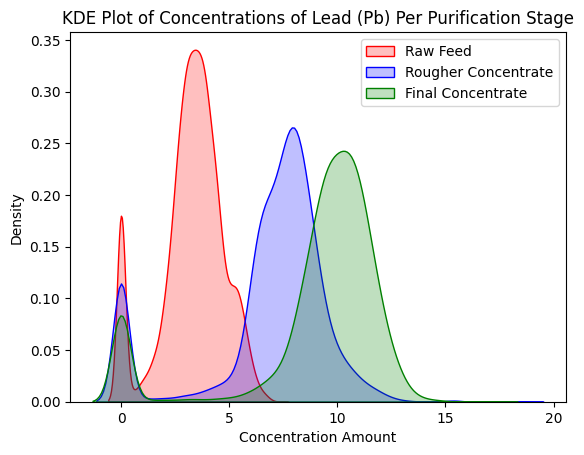

In [43]:
#Use sns.kdeplot() in order to create a KDE plot of the lead(pb) concentrations for each purification stage.
sns.kdeplot(data_full['rougher.input.feed_pb'], color='red', label='Raw Feed', shade=True)
sns.kdeplot(data_full['rougher.output.concentrate_pb'], color='blue', label='Rougher Concentrate', shade=True)
sns.kdeplot(data_full['final.output.concentrate_pb'], color='green', label='Final Concentrate', shade=True)

#Use matplotlib in order to dispay the KDE plot.
plt.xlabel("Concentration Amount")
plt.title("KDE Plot of Concentrations of Lead (Pb) Per Purification Stage")
plt.legend(loc='upper right')
plt.tight_layout

plt.show

Conclusion:
It appears that the Final Concentrate Stage peaks at the highest lead concentration value which would be: approximately 11.5.  The Final Concentrate Stage's lead concentration peak value has a kernel density of: approximately 0.24.  The Rougher Concentrate Stage peaks at the second highest lead concentration value, which would be: approximately 7.  The Rougher Concentrate's lead concentration peak value has a kernel density of: approximately 0.27.  The Final Concentrate Stage peaks at the lowest silver concentration value of: approximately 4.8.  The Raw Stage's lead concentraiton value has a kernel density of: approximately 0.34.

<div class="alert alert-block alert-success">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Everything is correct. Well done!
  
</div>

#### 2.2. Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect.

In [44]:
#Create variables for the 'rougher.input.feed_size' and the 'primary_cleaner.input.feed_size' columns of the training set.
r_feed_train = dt_clean['rougher.input.feed_size']
pc_feed_train = dt_clean['primary_cleaner.input.feed_size']

#Create variables for the 'rougher.input.feed_size' and the 'primary_cleaner.input.feed_size' columns of the test set.
r_feed_test = data_full['rougher.input.feed_size']
pc_feed_test = data_full['primary_cleaner.input.feed_size']

##### Rougher Input Feed Size Training and Test Set Distributions

##### Rougher Input Training And Test Set Feed Sizes Histograms

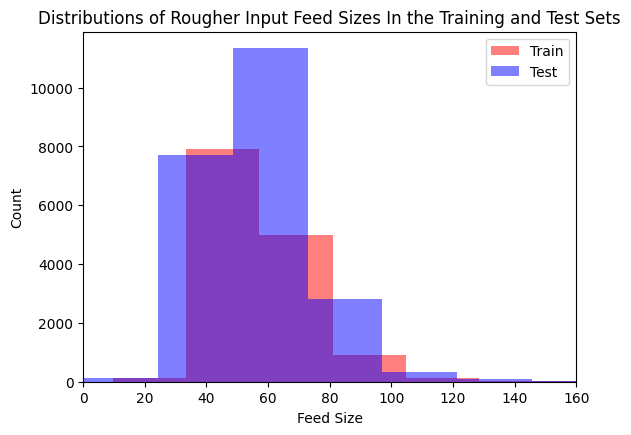

In [45]:
#Use matplotlib to create a histogram that displays the difference in distribution between the 'rougher.input.feed_size' 
#column values in the training set and in the test set.
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
plt.hist(r_feed_train, bins=20, alpha=0.5, label='Train', color='red')
plt.hist(r_feed_test, bins=20, alpha=0.5, label='Test', color='blue')

plt.legend(loc='upper right')
plt.title("Distributions of Rougher Input Feed Sizes In the Training and Test Sets")
plt.xlabel("Feed Size")
plt.ylabel("Count")

plt.xlim(0, 160)
plt.tight_layout
plt.show()

Conclusion: 
According to the histogram, the distribution of the values of the rougher input feed size in the training set has a peak value of:
approximately 38-58 at a count of: approximately 7800. The distribution of the values of the rougher input feed size in the test set has a peak value of: approximately 52-74 at a count of: approximately 1300.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

When we need to compare distributions with a different number of observations we need to plot normalized histograms to avoid dependence on the number of observations
  
</div>

##### Rougher Input Training Set Feed Sizes KDE Plot

<function matplotlib.pyplot.show(close=None, block=None)>

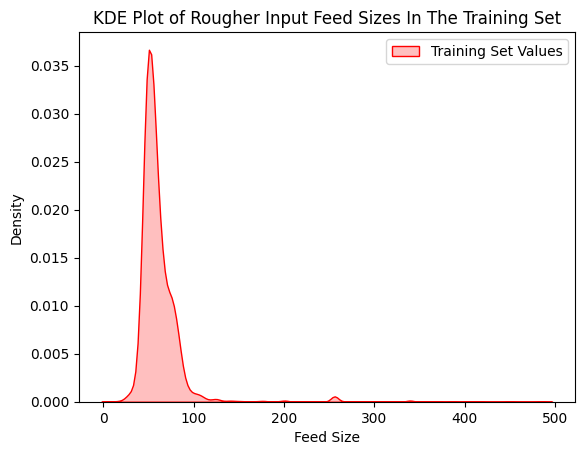

In [46]:
#Use sns.kdeplot() in order to create a KDE plot of the rougher input feed sizes in the training set.
sns.kdeplot(r_feed_train, color='red', label='Training Set Values', shade=True)

#Use matplotlib in order to dispay the KDE plot.
plt.legend(loc='upper right')
plt.xlabel("Feed Size")
plt.title("KDE Plot of Rougher Input Feed Sizes In The Training Set")
plt.tight_layout
plt.show

Conclusion:
It appears that the Training Set's Rougher Input Feed Size's peak value is: approximately 75.  The Training Set's Rougher Input Feed size peak value's kernel density is: approximately 0.037.

##### Rougher Input Test Set Feed Sizes KDE Plot

<function matplotlib.pyplot.show(close=None, block=None)>

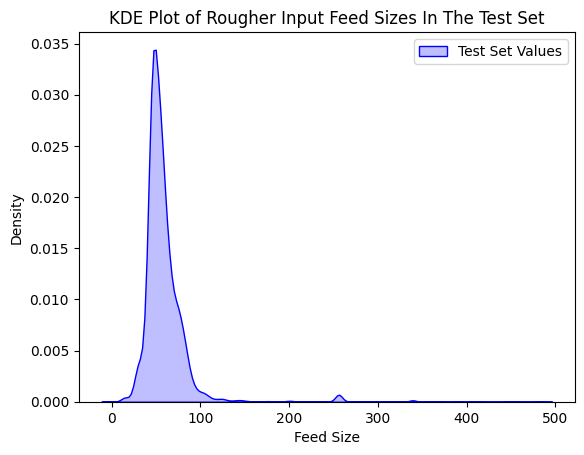

In [47]:
#Use sns.kdeplot() in order to create a KDE plot of the rougher input feed sizes in the test set.
sns.kdeplot(r_feed_test, color='blue', label='Test Set Values', shade=True)

#Use matplotlib in order to dispay the KDE plot.
plt.legend(loc='upper right')
plt.xlabel("Feed Size")
plt.title("KDE Plot of Rougher Input Feed Sizes In The Test Set")
plt.tight_layout
plt.show

Conclusion:
It appears that the Test Set's Rougher Input Feed Size's peak value is: approximately 75.  The Test Set's Rougher Input Feed size peak value's kernel density is: approximately 0.034.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

To compare distributions, you need to plot them on the same graph with different colors
  
</div>

Overall Conclusion About The Rougher Input Feed Sizes of the Training and Test Sets:
Although, according to the histogram the rougher input feed sizes have a greater peak value in the test set than in the training set, the KDE plots do not have major differences in the kernel density values of the rougher input feed sizes in the training set and test sets.  These values should not cause any issues with the model's predictions.

##### Primary Cleaner Feed Size Training and Test Set Distributions

#### Primary Cleaner Training Set And Test Set Feed Sizes Histograms

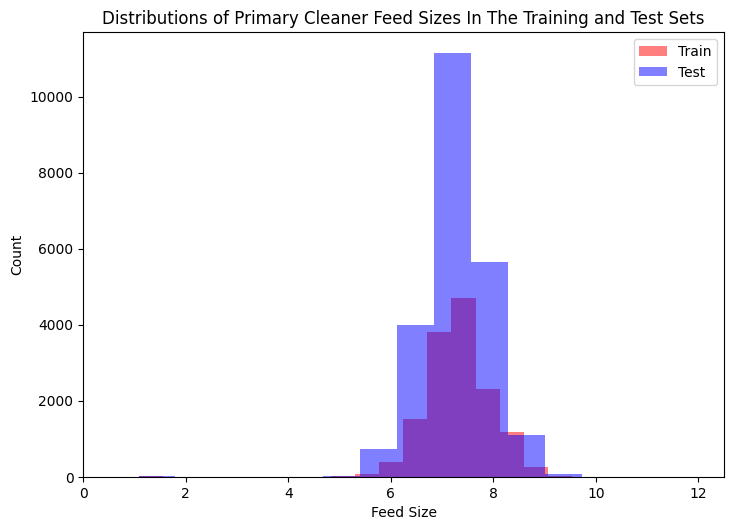

In [48]:
#Use matplotlib to create a histogram that displays the difference in distribution between the 'primary_cleaner.input.feed_size' 
#column values in the training set and in the test set.
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 2)
plt.hist(pc_feed_train, bins=20, alpha=0.5, label='Train', color='red')
plt.hist(pc_feed_test, bins=20, alpha=0.5, label='Test', color='blue')
plt.legend(loc='upper right')

plt.title("Distributions of Primary Cleaner Feed Sizes In The Training and Test Sets")
plt.xlabel("Feed Size")
plt.ylabel("Count")
plt.xlim(0, 12.5)

plt.tight_layout()
plt.show()

Conclusion: 
According to the histogram, the distribution of the values of the primary cleaner feed size in the training set has a peak value of: approximately 6.5-7.5 at a count of: approximately 1300. The distribution of the values of the primary cleaner feed size in the test set has a peak value of: approximately 7-7.5 at a count of: approximately 4800.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

When we need to compare distributions with a different number of observations we need to plot normalized histograms to avoid dependence on the number of observations
  
</div>

#### Primary Cleaner Training Set Feed Sizes KDE Plot

<function matplotlib.pyplot.show(close=None, block=None)>

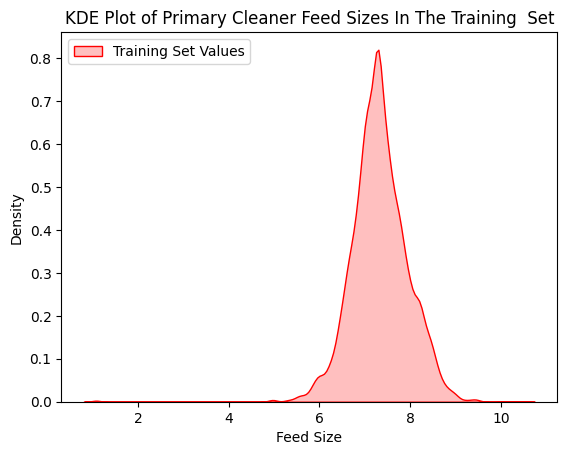

In [49]:
#Use sns.kdeplot() in order to create a KDE plot of the primary cleaner feed sizes in the training set.
sns.kdeplot(pc_feed_train, color='red', label='Training Set Values', shade=True)

#Use matplotlib in order to dispay the KDE plot.
plt.xlabel('Feed Size')
plt.legend(loc='upper left')
plt.tight_layout
plt.title("KDE Plot of Primary Cleaner Feed Sizes In The Training  Set")
plt.show

Conclusion:
It appears that the Training Set's Primary Cleaner Feed Size's peak value is: approximately 7.8.  The Test Set's Rougher Input Feed size peak value's kernel density is: approximately 0.83.

#### Primary Cleaner Test Set Feed Sizes KDE Plot

<function matplotlib.pyplot.show(close=None, block=None)>

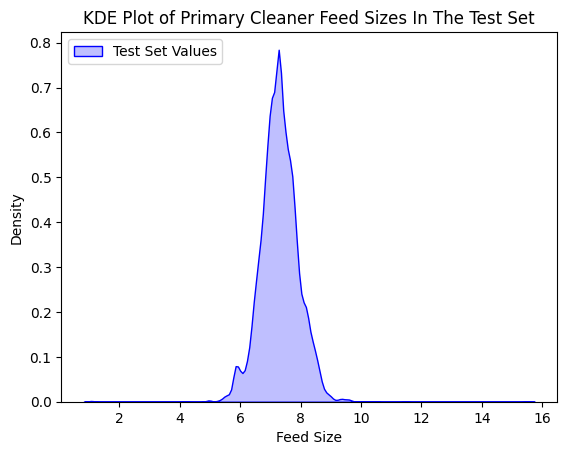

In [50]:
#Use sns.kdeplot() in order to create a KDE plot of the primary cleaner feed sizes in the test set.
sns.kdeplot(pc_feed_test, color='blue', label='Test Set Values', shade=True)

#Use matplotlib in order to dispay the KDE plot.
plt.xlabel('Feed Size')
plt.legend(loc='upper left')
plt.tight_layout
plt.title("KDE Plot of Primary Cleaner Feed Sizes In The Test Set")
plt.show

Conclusion:
It appears that the Training Set's Primary Cleaner Feed Size's peak value is: approximately 7.9.  The Test Set's Rougher Input Feed size peak value's kernel density is: approximately 0.79.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

To compare distributions, you need to plot them on the same graph with different colors
  
</div>

Overall Conclusion About The Primary Cleaner Feed Sizes of the Training and Test Sets:
According to the histogram, the primary cleaner feed sizes' peak values in the test set and in the training set do not vary significantly. According to the KDE plots, the primary cleaner feed sizes' peak values in the training and tests do also do not vary significantly and both peak values have similar kernal density values as well.  These values should not affect the model's predictions.

#### 2.3. Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies. 

In [51]:
#Create column indexes for the all metals in the the raw feed, rougher concentrate and final concentrate stages.
input_feed_columns = ['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb']

rougher_concentrate_columns = ['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb']

final_concentrate_columns = ['final.output.concentrate_au', 'final.output.concentrate_ag', 'rougher.output.concentrate_pb']

In [52]:
#Create a new column using the sum() method that contain the total sums of concentrate in the raw feed for the test set.
data_full['input_feed_sums'] = data_full[input_feed_columns].sum(axis=1)

#Create a new column using the sum() method that contain the total sums of concentrate in the rougher concentrate for the test set.
data_full['rougher_concentrate_sums'] = data_full[rougher_concentrate_columns].sum(axis=1)

#Create new columns using the sum() method that contain the total sums of concentrate in the final concentrate for the test set.
data_full['final_concentrate_sums'] = data_full[final_concentrate_columns].sum(axis=1)

##### Concentration Of All Metals Per Purification Stage Histograms

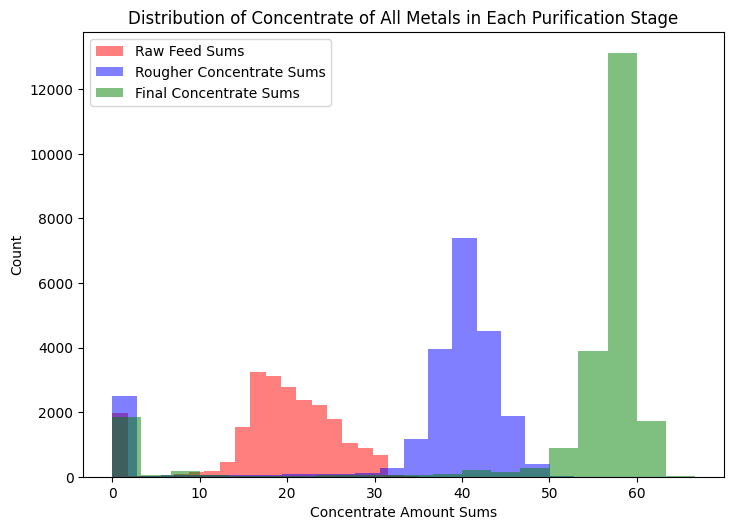

In [53]:
#Use matplotlib to illustrate the distribution of the total concentrations of all metals in the rougher input feed 
#in both the training set and the test set.
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 2)
plt.hist(data_full['input_feed_sums'], bins=20, alpha=0.5, label='Raw Feed Sums', color='red')
plt.hist(data_full['rougher_concentrate_sums'], bins=20, alpha=0.5, label='Rougher Concentrate Sums', color='blue')
plt.hist(data_full['final_concentrate_sums'], bins=20, alpha=0.5, label='Final Concentrate Sums', color='green')
plt.legend(loc='upper left')

plt.title("Distribution of Concentrate of All Metals in Each Purification Stage")
plt.xlabel("Concentrate Amount Sums")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

Conclusion:
Conclusion:
According to the histogram, the Final Concentrate Stage has the greatest amount of concentration of all metals, with a peak value of: approximately 57-62 and a count of: approximately 13900 values.  The Rougher Concentrate Stage has the second concentration of all metals, with a peak value of: approximately 38-43 and a count of: approximately 7700 values.  The Raw Feed Stage has the lowest concentration of all metals, with a peak value of: approximately 15-16 and a count of approximately 3200 values.

It also appears that there seems to be notable concentration of zero values in the: 'input_feed_sums' (Raw Feed Sums), 'rougher_concentrate_feed_sums' (Rougher Concentrate Sums), and 'final_concentrate_sums' (Final Concentrate Sums) columns.  I will verify this observation and address the zero values in the next cells.


In [54]:
#Use conditional filtering to check for values equivalent to '0' in the input_feed_sums column of the test set.
data_full[data_full['input_feed_sums'] == 0]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,input_feed_sums,rougher_concentrate_sums,final_concentrate_sums
99,2016-01-19 03:00:00,0.0,0.0,0.0,0.0,58.017871,0.0,0.0,0.0,0.0,...,-603.234250,9.974968,-497.092974,7.953962,-499.698442,11.941642,-598.541756,0.0,0.0,0.0
100,2016-01-19 04:00:00,0.0,0.0,0.0,0.0,58.017871,0.0,0.0,0.0,0.0,...,-623.446329,9.898782,-499.623262,7.979302,-500.283366,11.959950,-600.998301,0.0,0.0,0.0
101,2016-01-19 05:00:00,0.0,0.0,0.0,0.0,58.017871,0.0,0.0,0.0,0.0,...,-638.103348,9.956309,-499.791870,7.978806,-500.202026,11.987839,-600.302819,0.0,0.0,0.0
102,2016-01-19 06:00:00,0.0,0.0,0.0,0.0,58.017871,0.0,0.0,0.0,0.0,...,-641.310327,9.966952,-499.842458,8.053455,-499.588522,11.987935,-600.523057,0.0,0.0,0.0
103,2016-01-19 07:00:00,0.0,0.0,0.0,0.0,58.017871,0.0,0.0,0.0,0.0,...,-641.457227,10.033820,-501.291438,7.985956,-499.934267,12.027556,-600.108918,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17908,2018-01-30 03:59:59,0.0,0.0,0.0,0.0,73.755683,0.0,0.0,0.0,0.0,...,-500.230461,10.909829,-500.314837,9.007956,-500.153163,10.988968,-500.387261,0.0,0.0,0.0
17909,2018-01-30 04:59:59,0.0,0.0,0.0,0.0,73.755683,0.0,0.0,0.0,0.0,...,-524.758657,10.961487,-500.066426,9.004925,-500.040902,10.961121,-500.023096,0.0,0.0,0.0
17910,2018-01-30 05:59:59,0.0,0.0,0.0,0.0,73.755683,0.0,0.0,0.0,0.0,...,-499.995375,10.991333,-499.941268,9.062215,-499.992738,10.996987,-499.871678,0.0,0.0,0.0
17911,2018-01-30 06:59:59,0.0,0.0,0.0,0.0,73.755683,0.0,0.0,0.0,0.0,...,-500.303435,10.980523,-500.095725,9.041985,-499.916563,11.010581,-500.083532,0.0,0.0,0.0


Conclusion:
There appears to be zero values in the 'input_feed_sums' (Raw Feed Sums) column of the data_full dataframe.

In [55]:
#Use conditional filtering to check for values equivalent to '0' in the rougher_concentrate_sums column of the test set.
data_full[data_full['rougher_concentrate_sums'] == 0]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,input_feed_sums,rougher_concentrate_sums,final_concentrate_sums
45,2016-01-16 21:00:00,4.566664,10.406178,4.588698,46.614456,68.403877,10.705777,1.509070,17.875134,2.509776,...,-550.570104,10.052072,-500.797905,7.984500,-499.581046,11.982025,-599.161228,17.447608,0.0,51.181120
46,2016-01-16 22:00:00,4.577832,10.691605,5.274175,46.250638,70.675633,10.728531,1.641216,18.349339,2.540843,...,-550.496522,9.953139,-500.330920,8.012074,-500.133530,11.975316,-598.839683,17.938550,0.0,50.828470
47,2016-01-16 23:00:00,4.591462,10.628846,5.688961,46.663335,55.088448,10.694584,1.671644,17.910312,2.686782,...,-550.095619,9.981163,-502.869109,7.941184,-500.623610,12.018837,-600.916665,15.285978,0.0,51.254797
48,2016-01-17 00:00:00,5.296830,10.597469,5.688961,44.015642,41.962008,11.975654,1.846558,8.138408,2.889469,...,-550.778624,9.989726,-499.607365,7.958252,-498.882560,11.967977,-599.440603,13.535634,0.0,49.312473
49,2016-01-17 01:00:00,7.256114,9.017677,5.688961,43.389252,41.962008,12.100582,1.758360,4.606019,3.202483,...,-549.583570,10.094584,-492.041563,8.054770,-498.802262,11.961330,-597.272218,0.088703,0.0,50.645366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18216,2018-02-11 23:59:59,4.909904,9.941006,8.191698,47.660737,83.597741,8.853800,0.717677,13.399798,1.515512,...,-500.386063,10.998883,-499.846204,8.972741,-500.118532,10.966205,-500.707126,19.134226,0.0,52.570641
18217,2018-02-12 00:59:59,4.797572,9.889303,8.326773,47.801056,84.738648,8.503813,0.757507,13.591903,1.573222,...,-499.891798,11.010768,-494.562898,9.028307,-499.007596,10.978016,-497.924873,20.260847,0.0,52.598628
18218,2018-02-12 01:59:59,4.329492,9.413122,8.173988,49.412576,73.519948,8.846540,1.479231,13.094763,2.760905,...,-499.873967,11.034954,-493.250025,9.029441,-480.953533,11.021042,-499.685577,20.815431,0.0,53.742068
18219,2018-02-12 02:59:59,4.317169,9.642271,8.396492,48.839994,78.415342,8.485093,1.155559,13.380461,2.198065,...,-500.084773,10.972473,-511.806312,8.991251,-500.706169,10.990072,-499.775802,20.339423,0.0,53.157163


Conclusion:
There appears to be zero values in the 'rougher_concentrate_sums' (Rougher Concentrate Sums) column of the data_full dataframe.

In [56]:
#Use conditional filtering to check for values equivalent to '0' in the final_concentrate_sums column of the test set.
data_full[data_full['final_concentrate_sums'] == 0]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,input_feed_sums,rougher_concentrate_sums,final_concentrate_sums
99,2016-01-19 03:00:00,0.0,0.0,0.0,0.0,58.017871,0.0,0.0,0.0,0.0,...,-603.234250,9.974968,-497.092974,7.953962,-499.698442,11.941642,-598.541756,0.000000,0.0,0.0
100,2016-01-19 04:00:00,0.0,0.0,0.0,0.0,58.017871,0.0,0.0,0.0,0.0,...,-623.446329,9.898782,-499.623262,7.979302,-500.283366,11.959950,-600.998301,0.000000,0.0,0.0
101,2016-01-19 05:00:00,0.0,0.0,0.0,0.0,58.017871,0.0,0.0,0.0,0.0,...,-638.103348,9.956309,-499.791870,7.978806,-500.202026,11.987839,-600.302819,0.000000,0.0,0.0
102,2016-01-19 06:00:00,0.0,0.0,0.0,0.0,58.017871,0.0,0.0,0.0,0.0,...,-641.310327,9.966952,-499.842458,8.053455,-499.588522,11.987935,-600.523057,0.000000,0.0,0.0
103,2016-01-19 07:00:00,0.0,0.0,0.0,0.0,58.017871,0.0,0.0,0.0,0.0,...,-641.457227,10.033820,-501.291438,7.985956,-499.934267,12.027556,-600.108918,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17909,2018-01-30 04:59:59,0.0,0.0,0.0,0.0,73.755683,0.0,0.0,0.0,0.0,...,-524.758657,10.961487,-500.066426,9.004925,-500.040902,10.961121,-500.023096,0.000000,0.0,0.0
17910,2018-01-30 05:59:59,0.0,0.0,0.0,0.0,73.755683,0.0,0.0,0.0,0.0,...,-499.995375,10.991333,-499.941268,9.062215,-499.992738,10.996987,-499.871678,0.000000,0.0,0.0
17911,2018-01-30 06:59:59,0.0,0.0,0.0,0.0,73.755683,0.0,0.0,0.0,0.0,...,-500.303435,10.980523,-500.095725,9.041985,-499.916563,11.010581,-500.083532,0.000000,0.0,0.0
17912,2018-01-30 07:59:59,0.0,0.0,0.0,0.0,73.755683,0.0,0.0,0.0,0.0,...,-499.966176,10.950164,-499.910890,9.016255,-499.821464,11.006784,-499.988820,0.000000,0.0,0.0


Conclusion:
There appears to be zero values in the 'rougher_concentrate_sums' (Rougher Concentrate Sums) column of the data_full dataframe.

In [57]:
#Use conditional filtering to make sure that the data_full dataframe does not contain rows with zero values in the: 'input_feed_sums',
#'rougher_concentrate_sums' and 'final_concentrate_sums' columns.
data_full = data_full[data_full['input_feed_sums'] > 0]
data_full = data_full[data_full['rougher_concentrate_sums'] > 0]
data_full = data_full[data_full['final_concentrate_sums'] > 0]

##### Concentration Of All Metals Per Purification Stage Histograms (Zero Values Removed)

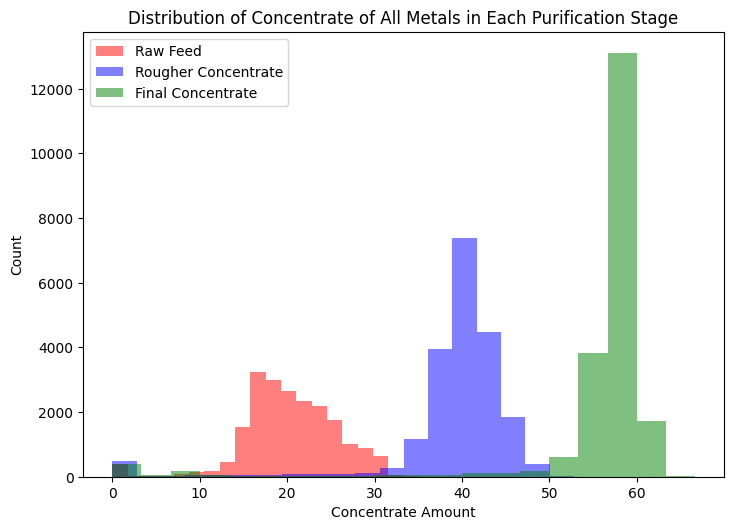

In [58]:
#Use matplotlib to illustrate the distribution of the total concentrations of all metals in the rougher input feed 
#in both the training set and the test set without zero values.
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 2)
plt.hist(data_full['input_feed_sums'], bins=20, alpha=0.5, label='Raw Feed', color='red')
plt.hist(data_full['rougher_concentrate_sums'], bins=20, alpha=0.5, label='Rougher Concentrate', color='blue')
plt.hist(data_full['final_concentrate_sums'], bins=20, alpha=0.5, label='Final Concentrate', color='green')
plt.legend(loc='upper left')

plt.title("Distribution of Concentrate of All Metals in Each Purification Stage")
plt.xlabel("Concentrate Amount")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

Conclusion:
It appears that the zero values have been successfully removed from the: 'input_feed_sums' (Raw Feed Sums), 'rougher_concentrate_sums' (Rougher Concentrate Sums), and the 'final_concentrate_sums' (Final Concentrate Sums) columns of the 
data_full dataframe.

##### Concentration Of All Metals Per Purification Stage KDE Plot (Zero Values Removed)

<function matplotlib.pyplot.show(close=None, block=None)>

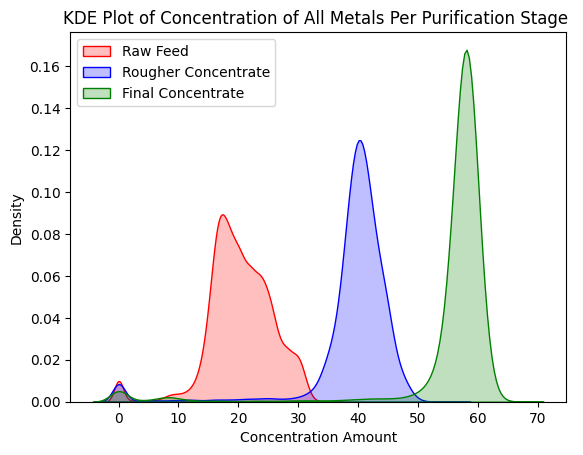

In [59]:
#Use sns.kdeplot() in order to display a kde plot of the concentration of all metal for each purification stage
sns.kdeplot(data_full['input_feed_sums'], color='red', label='Raw Feed', shade=True)
sns.kdeplot(data_full['rougher_concentrate_sums'], color='blue', label='Rougher Concentrate', shade=True)
sns.kdeplot(data_full['final_concentrate_sums'], color='green', label='Final Concentrate', shade=True)

#Use matplotlib in order to display the kde plot.
plt.legend(loc='upper left')
plt.xlabel("Concentration Amount")
plt.title("KDE Plot of Concentration of All Metals Per Purification Stage ")
plt.tight_layout
plt.show

Conclusion:
It appears that the Final Concentrate Stage peaks at the highest value of concentration of all metals which would be: approximately 59.5.  The Final Concentrate Stage's concentration of all metals' peak value has a kernel density of: approximately 0.28.  The Rougher Concentrate Stage peaks at the second highest value of concentration of all metals, which would be: approximately 41.  The Rougher Concentrate's concentration of all metals' peak value has a kernel density of: approximately 0.13.  The Raw Stage peaks at the lowest value of concentrations of all metals which would be: approximately 18.5.  The Raw Feed's concentration of all metals' peak value has a kernel density of: approximately 0.093.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Everything is correct. Good job! But you need to filter your train data. You need to filter the data, to simplify the life for your ML models. But if you filter only full data, it doesn't affect on the train one.
  
</div>

##### Final sMAPE Function

In [60]:
#Create a function that calculates the final sMAPE values calculated using the target and the predicted data.
def fsmape(y_true, y_pred_df):
    n = len(y_true)
    smape_values = []
    for actual, predicted in zip(y_true, y_pred_df[0]):
        numerator = abs(actual - predicted)
        denominator = (abs(actual) + abs(predicted)) / 2
        smape_values.append(numerator / denominator if denominator != 0 else 0.0)
    
    smape_values_2 = []
    for actual, predicted in zip(y_true, y_pred_df[1]):
        numerator = abs(actual - predicted)
        denominator = (abs(actual) + abs(predicted)) / 2
        smape_values_2.append(numerator / denominator if denominator != 0 else 0.0)
    
    rougher_smape = (100 / n) * sum(smape_values)
    final_smape = (100 / n) * sum(smape_values_2)
    
    final = 0.25 * rougher_smape + 0.75 * final_smape 
    
    return final

<div class="alert alert-block alert-warning">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

It is possible to use such loops to calculate smape. But this is the slowest solution. It's better to rewrite the function without loops.
  
</div>

In [61]:
#Use the make_scorer() method in order to use the previously created fsmape function as a metric for cross validation.
fsmape_scorer = make_scorer(fsmape, greater_is_better=True)

##### Note to Reviewer:
I am not sure why, but when I set the greater_is_better parameter to False, the cross validation function gives outputs consisting of negative values, but when I set the  greater_is_better parameter to True the cross validation function gives the desired outputs consisting of postive values.  My previous codes appeared to correct to me, so I decided to leave the parameter as is.

#### 3.2. Train different models. Evaluate them using cross-validation. Pick the best model and test it using the test sample. Provide findings.

##### Target and Features Preparation

In [62]:
#Create an index for the targets.
targets = ['rougher.output.recovery','final.output.recovery']
#Create an index for the features.
features = data_test.columns.values

#Create a features from the training set using the previously created features index.
x_train = dt_clean[features].reset_index(drop=True)
#Create targets from the training set using the previously created target index.
y_train = dt_clean[targets].reset_index(drop=True)
#Drop the date column from the training set features.
x_train = x_train.drop(['date'], axis=1)
#Add column names to the training set targets.
y_train.columns = [0, 1]

#Create a features from the test set using the previously created features index.
#Use the data_full dataframe.
x_test = data_full[features].reset_index(drop=True)
#Create targets from the training set using the previously created target index.
#Use the data_full dataframe.
y_test = data_full[targets].reset_index(drop=True)
#Drop the date column from the test set features.
x_test = x_test.drop(['date'], axis=1)
#Add column names to the test set targets.
y_test.columns = [0, 1]

In [63]:
#Use np.random.RandomState() to create a random state for each of the models.
state = np.random.RandomState(12345)

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

1. You can't use a full data as a test data. You have a test data in a corresponding file and you can use only this data as test one.
2. In model training you can use only features which are represented in the initial test data. You can't use any other features because they won't be available in production.
  
</div>

##### Linear Regression Model

In [64]:
#Use Pipeline() and LinearRegression() to create a Linear Regression model.
lr = Pipeline([('scaler', StandardScaler()), ('regressor', LinearRegression())])

In [65]:
#Use cross_val_score to cross validate the model using the fsmape function as a metric.
lr_scores = cross_val_score(lr, x_train, y_train, cv=5, scoring=fsmape_scorer)

#Calculate the mean of the cross validation scores.
lr_score_mean = lr_scores.mean()

print(f"Linear Regression Model Cross Validation Scores Mean:\n{lr_score_mean}")

Linear Regression Model Cross Validation Scores Mean:
0.13789183395598878


In [66]:
#Train the Linear Regression model with the target and features of the training set.
lr.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [67]:
#Use the predict() method on the Linear Regression model to make a prediction using the features from the test set.
lr_predict = lr.predict(x_test)

In [68]:
#Calculate the fSMAPE metric using the targets from the test set and the predictions from the features of the test set.
lr_fsmape = fsmape(y_test, lr_predict)

print(f"Linear Regression Model fSMAPE: \n{lr_fsmape}")

Linear Regression Model fSMAPE: 
0.01907946523865437


##### Decision Tree Regressor Model

In [69]:
#Use DecisionTreeRegressor() to create a Decision Tree Regressor model.
dt = DecisionTreeRegressor(random_state=state)

In [70]:
#Use cross_val_score to cross validate the model using the fsmape function as a metric.
dt_scores = cross_val_score(dt, x_train, y_train, cv=5, scoring=fsmape_scorer)

#Calculate the mean of the cross validation scores.
dt_score_mean = dt_scores.mean()

print(f"Decision Tree Regressor Cross Validation Scores Mean: \n{dt_score_mean}")

Decision Tree Regressor Cross Validation Scores Mean: 
0.12751525517283513


In [71]:
#Train the Decision Tree Regressor model with the target and features of the training set.
dt.fit(x_train, y_train)

DecisionTreeRegressor(random_state=RandomState(MT19937) at 0x7F5D185CB640)

In [72]:
#Use the predict() method on the Decision Tree Regressor model to make a prediction using the features from the test set.
dt_predicted = dt.predict(x_test)

In [73]:
#Calculate the fSMAPE metric using the targets from the test set and the predictions from the features of the test set.
dt_fsmape = fsmape(y_test, dt_predicted)

print(f"Decision Tree Regressor Model fSMAPE: \n{dt_fsmape}")

Decision Tree Regressor Model fSMAPE: 
0.01910341663314217


##### K Nearest Neighbors Regressor Model

In [74]:
#Use  KNeighborsRegressor() to create a K Nearest Neighbors Regressor model.
knn = KNeighborsRegressor()

In [75]:
#Use cross_val_score to cross validate the model using the fsmape function as a metric.
knn_scores = cross_val_score(knn, x_train, y_train, cv=5, scoring=fsmape_scorer)

#Calculate the mean of the cross validation scores.
knn_score_mean = knn_scores.mean()

print(f"K Nearest Neighbors Regressor Cross Validation Scores Mean: \n{knn_score_mean}")

K Nearest Neighbors Regressor Cross Validation Scores Mean: 
0.13777917751472438


In [76]:
#Train the K Nearest Neighbors Regressor model with the target and features of the training set.
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [77]:
#Use the predict() method on the K Nearest Neighbors Regressor model to make a prediction using the features from the test set.
knn_predicted = knn.predict(x_test)

In [78]:
#Calculate the fSMAPE metric using the targets from the test set and the predictions from the features of the test set.
knn_fsmape = fsmape(y_test, knn_predicted)

print(f"K Nearest Neighbors fSMAPE: \n{knn_fsmape}")

K Nearest Neighbors fSMAPE: 
0.019099431790011702


##### Polynomial Features Model

In [79]:
#Use make_pipeline(), PolynomialFeatures() and LinearRegression() to create a Polynomial Features model.
pf = make_pipeline(PolynomialFeatures(), LinearRegression())

In [80]:
#Use cross_val_score to cross validate the model using the fsmape function as a metric.
pf_scores = cross_val_score(pf, x_train, y_train, cv=5, scoring=fsmape_scorer)

#Calculate the mean of the cross validation scores.
pf_score_mean = pf_scores.mean()

print(f"Polynomial Features Model Cross Validation Scores Mean: \n{pf_score_mean}")

Polynomial Features Model Cross Validation Scores Mean: 
0.13777075913693382


In [81]:
#Train the Polynomial Features model with the target and features of the training set.
pf.fit(x_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [82]:
#Use the predict() method on the Polynomial Features model to make a prediction using the features from the test set.
pf_predicted = pf.predict(x_test)

In [83]:
#Calculate the fSMAPE metric using the targets from the test set and the predictions from the features of the test set.
pf_fsmape = fsmape(y_test, pf_predicted)

print(f"Polynomial Features fSMAPE \n{pf_fsmape}")

Polynomial Features fSMAPE 
0.01910765408134161


##### Random Forest Regressor Model

In [84]:
#Use RandomForestRegressor() to create a Random Forest Regressor model.
rf = RandomForestRegressor(random_state=state)

In [85]:
#Use cross_val_score to cross validate the model using the fsmape function as a metric.
rf_scores = cross_val_score(rf, x_train, y_train, cv=5, scoring=fsmape_scorer)

#Calculate the mean of the cross validation scores.
rf_score_mean = rf_scores.mean()

print(f"Random Forest Regressor Model Cross Validation Scores Mean: \n{rf_score_mean}")

Random Forest Regressor Model Cross Validation Scores Mean: 
0.13777935701320604


In [86]:
#Train the Random Forest Regressor model with the target and features of the training set.
rf.fit(x_train, y_train)

#Use the predict() method on the Linear Regression model to make a prediction using the features from the test set.
rf_predicted = rf.predict(x_test)

In [87]:
#Calculate the fSMAPE metric using the targets from the test set and the predictions from the features of the test set.
rf_fsmape = fsmape(y_test, rf_predicted)

print(f"Random Forest Regressor Model fSMAPE: \n{rf_fsmape}")

Random Forest Regressor Model fSMAPE: 
0.019102220307945873


Conclusion:
According to the results the model with the lowest fSMAPE metric is the Linear Regression model which has an fSMAPE of: approximately 0.019079 and a mean fSMAPE cross validation score of: approximately 0.1378918. This model is the best model for predicting the amount of gold recovered from gold ore.

The next best models for the task are in order as follows:
2)  K Nearest Neighbors, with an fSMAPE of: approximately 0.019099 and a mean fSMAPE cross validation score of: approximately 0.1377791.
3)  Random Forest Regressor, with an fSMAPE of: 0.191022 approximately  and a mean fSMAPE cross validation score of: approximately 0.1377793.
4)  Decision Tree Regressor, with an fSMAPE of: approximately 0.0191034 and a mean fSMAPE cross validation score of: approximately 0.1275152.
5)  Polynomial Features, with an fSMAPE of: approximately 0.0191076 and a mean fSMAPE cross validation score of: approximately 0.1377707.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

The results are different because you use different features and train the model on different dataparts.

1. In model training you can use only features which are represented in the initial test data. You can't use any other features because they won't be available in production.
2. You need to tune hyperparameters at least for one model.
3. You need to calculate metrics on the test data for the best model. You already have a test data from the corresponding file. To calculate metrics you need to know targets, right? You can find targets for the test data in the full data. You can use method merge and column date to extract these targets.
4. You need to do sanity check. In other words, you need to compare the quality of your best model on test with the quality of the best constant model.
    
</div>

#### Final Conclusion:
In conclusion I have noted several final observations about the project:
1) The recovery is not calculated 100% accurate, but it has a low mean estimated error when compared to my calculated recovery metric with is: approximately 9.30.

2) Gold (Ag) has the highest concentration in the final concentrate stage with a peak value of approximately 43-45 with a count of approximately 8300 according to the histogram, and peak value of approximately 47 with a kernel density of approximately 0.127 according to the KDE Plot. Silver (Ag) has the highest concentration in the rougher concentrate stage with a peak value of approximately 12-12.5 consisting of approximately 4100 according to the histogram, and a peak value of approximately 12.5 with a kernel density of approximately 0.08 according to the KDE plot. Lead (Pb) has the highest concentration in the final concentrate stage with a peak value of approximately 10.5-11 and a count of approximately 4700 according to the histogram, and a peak value of approximately 11.5 with a kernel density of approximately 0.24 according to the KDE plot.

3)  The Rougher Input Feed Sizes columns' values in the training and tests sets did not vary significantly according to the histograms and KDE plots and should not affect the models' predictions. The Primary Cleaner Feed Sizes columns' values in the training and tests sets did not vary significantly according to the histograms and KDE plots and should not affect the models' predictions.

4) According to the histogram, the Final Concentrate Stage has the greatest amount of concentration of all metals, with a peak value of: approximately 57-62 and a count of: approximately 13900 values. According to the KDE plot, the Final Concentrate Stage had the highest peak value of concentration of all metals which would be: approximately 59.5 and a kernel denisty of: approximately 0.28.

5) The model with the lowest fSMAPE metric is the Linear Regression model which has an fSMAPE of: approximately 0.019079 and a mean fSMAPE cross validation score of: approximately 0.1378918. This model is the best model for predicting the amount of gold recovered from gold ore.
